In [161]:
import math
import quandl
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import Markdown
import statsmodels.formula.api as sm
from matplotlib.ticker import PercentFormatter

In [162]:
tickers = {
    "MSCI World" : 'CHRIS/EUREX_FMWO1',
    "MSCI Japan" : 'CHRIS/EUREX_FMJP1',
    "MSCI Europe" : 'CHRIS/EUREX_FMEU1',
    "MSCI Emerging Markets" : 'CHRIS/EUREX_FMEM1',
    "MSCI Asia_Ex Japan" : 'CHRIS/EUREX_FMAS1',
    "FTSE 100" : 'CHRIS/LIFFE_Z1',
    "Euro STOXX 50" : 'CHRIS/EUREX_FESX1'
}

In [163]:
# Index Data
tickerOne = 'CHRIS/EUREX_FMWO1'
data_raw = quandl.get(tickerOne, authtoken="vbGAyFgFrM9L4qLgEx_n")

for ticker in tickers:
    data_temp = quandl.get(tickers.get(ticker), authtoken="vbGAyFgFrM9L4qLgEx_n")
    data_raw[tickers.get(ticker)[6:]] = data_temp['Settle']
    
data_raw = data_raw.drop('Open', 1)
data_raw = data_raw.drop('High', 1)
data_raw = data_raw.drop('Low', 1)
data_raw = data_raw.drop('Settle', 1)
data_raw = data_raw.drop('Volume', 1)
data_raw = data_raw.drop('Prev. Day Open Interest', 1)

In [164]:
# Leading Economic Indicators
#pmi_data = "ISM/MAN_PMI"
# pmi_data_raw = quandl.get(pmi_data, authtoken="vbGAyFgFrM9L4qLgEx_n")

# building_permits = "FRED/PERMIT"
# building_permits_data = quandl.get(building_permits, authtoken="vbGAyFgFrM9L4qLgEx_n")

In [165]:
period = 60

for ticker in tickers:
    data_raw[tickers.get(ticker)[6:]+'periodma'] = data_raw[tickers.get(ticker)[6:]].rolling(window=period,center=False).mean()
    data_raw[tickers.get(ticker)[6:]+'dperiodma'] = data_raw[tickers.get(ticker)[6:]+'periodma'].shift(-1) - data_raw[tickers.get(ticker)[6:]+'periodma']
    data_raw.fillna(method='pad', inplace=True)
    data = data_raw.tail(period*8)

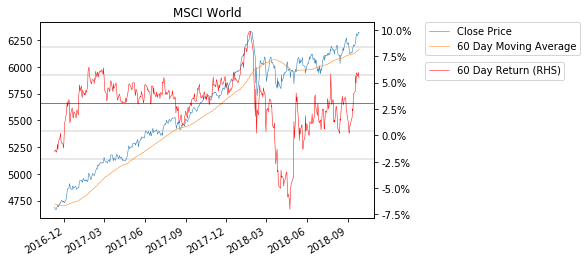

**Data & Technical Indicators for MSCI World**

Last Close: 6315.0

Mean 60 day return: 3.0335%; 2.6516% std dev

Current 60 day return: 5.5167%; 0.9365 std dev from mean

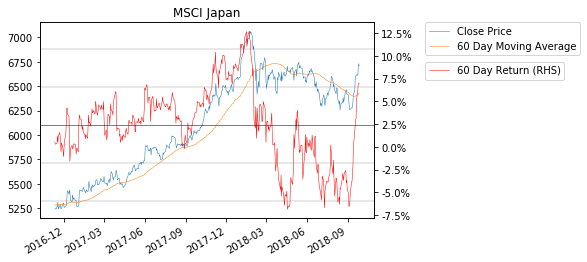

**Data & Technical Indicators for MSCI Japan**

Last Close: 6710.0

Mean 60 day return: 2.4087%; 4.2012% std dev

Current 60 day return: 6.9333%; 1.077 std dev from mean

60 day return is 1 std or more from its average. Keep an eye on this.

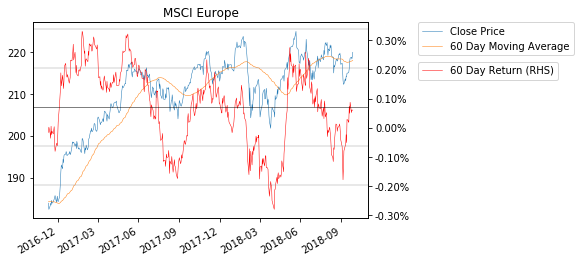

**Data & Technical Indicators for MSCI Europe**

Last Close: 219.9

Mean 60 day return: 0.0702%; 0.1337% std dev

Current 60 day return: 0.06%; -0.0765 std dev from mean

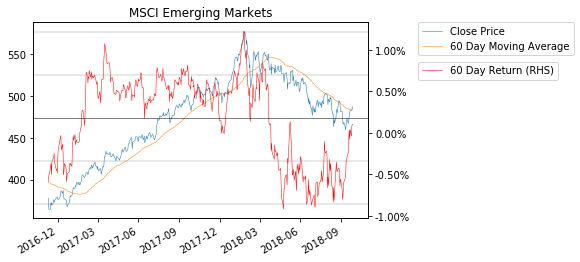

**Data & Technical Indicators for MSCI Emerging Markets**

Last Close: 487.0

Mean 60 day return: 0.1821%; 0.5203% std dev

Current 60 day return: 0.1033%; -0.1515 std dev from mean

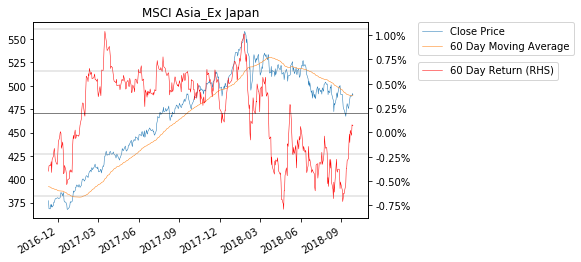

**Data & Technical Indicators for MSCI Asia_Ex Japan**

Last Close: 490.6

Mean 60 day return: 0.2034%; 0.4268% std dev

Current 60 day return: 0.07%; -0.3126 std dev from mean

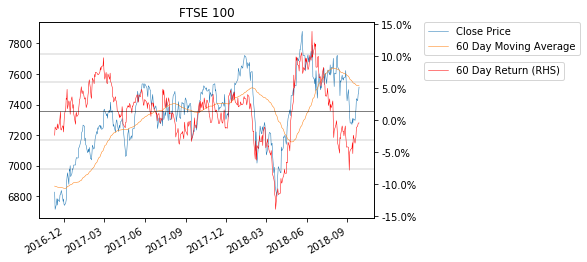

**Data & Technical Indicators for FTSE 100**

Last Close: 7514.0

Mean 60 day return: 1.3675%; 4.5298% std dev

Current 60 day return: -0.4417%; -0.3994 std dev from mean

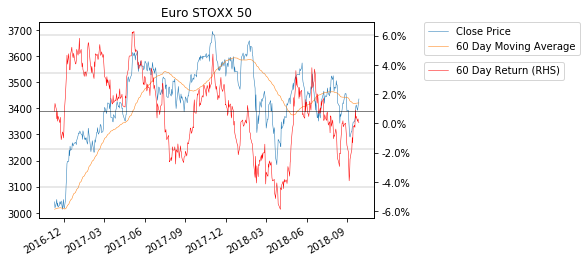

**Data & Technical Indicators for Euro STOXX 50**

Last Close: 3436.0

Mean 60 day return: 0.8487%; 2.609% std dev

Current 60 day return: 0.0667%; -0.2998 std dev from mean

In [166]:
for ticker in tickers:
        
    fix, ax1 = plt.subplots() 
    ax2 = ax1.twinx()
    plt.gcf().autofmt_xdate()
        
    ax1.set_title(ticker)
    ax1.plot(data[tickers.get(ticker)[6:]], label="Close Price", linewidth=0.5)
    ax1.plot(data[tickers.get(ticker)[6:]+'periodma'], label=str(period)+" Day Moving Average", linewidth=0.5)
    ax1.legend(bbox_to_anchor=(1.15, 1), loc='upper left', borderaxespad=0.)
    
    ax2.yaxis.set_major_formatter(PercentFormatter())
    ax2.plot(data[tickers.get(ticker)[6:]+'dperiodma'], label=str(period)+" Day Return (RHS)", color = 'r', linewidth=0.5)
    ax2.legend(bbox_to_anchor=(1.15, .80), loc='upper left', borderaxespad=0.)    
   
    ax2.axhline(data[tickers.get(ticker)[6:]+'dperiodma'].mean(), color='black', linewidth=0.5, label="Mean Return")
    ax2.axhline(data[tickers.get(ticker)[6:]+'dperiodma'].mean() + data[tickers.get(ticker)[6:]+'dperiodma'].std(), color='grey', linewidth=0.35)
    ax2.axhline(data[tickers.get(ticker)[6:]+'dperiodma'].mean() - data[tickers.get(ticker)[6:]+'dperiodma'].std(), color='grey', linewidth=0.35)
    ax2.axhline(data[tickers.get(ticker)[6:]+'dperiodma'].mean() + data[tickers.get(ticker)[6:]+'dperiodma'].std()*2, color='grey', linewidth=0.35)
    ax2.axhline(data[tickers.get(ticker)[6:]+'dperiodma'].mean() - data[tickers.get(ticker)[6:]+'dperiodma'].std()*2, color='grey', linewidth=0.35)
    plt.show()
    
    meanPeriodReturn = data[tickers.get(ticker)[6:]+'dperiodma'].mean()
    meanPeriodReturnVol = data[tickers.get(ticker)[6:]+'dperiodma'].std()
    currentPeriodReturn = data.iloc[-1][tickers.get(ticker)[6:]+'dperiodma']
    currentlyTradingAt = (currentPeriodReturn - meanPeriodReturn)/meanPeriodReturnVol
    
    display (Markdown('**Data & Technical Indicators for '+ticker+'**'))
    display (Markdown('Last Close: '+str(data.iloc[-1][tickers.get(ticker)[6:]])))
    display (Markdown('Mean '+str(period)+' day return: '+str(round(meanPeriodReturn, 4))+'%; '+str(round(meanPeriodReturnVol, 4))+'% std dev'))
    display (Markdown('Current '+str(period)+' day return: '+str(round(currentPeriodReturn, 4))+'%; '+str(round(currentlyTradingAt, 4))+' std dev from mean'))

    if(currentlyTradingAt > 2 or currentlyTradingAt < -2):
        print()
        display (Markdown(str(period)+' day return is 2 std or more from its average. <span style="color: #ff0000">Potential opportunity</span>'))

    elif(currentlyTradingAt > 1 or currentlyTradingAt < -1):
        display (Markdown(str(period)+' day return is 1 std or more from its average. Keep an eye on this.'))
